This page contain all the unitary tests made to validate the results of each subroutine of the Prestel module.

Each value defined in the python scripts below are defined with the same value in the UnitaryTests.f90 file.

In [466]:
from numpy import *
from plot import *
seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

# density 1D

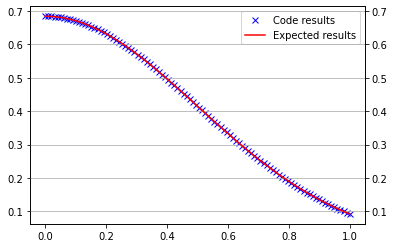

Expected result: 1
Code result:     1.0


In [467]:
try:
    N = 100
    Mass = 1
    r, dr = linspace(0,1,N,retstep=True)
    sigma = 1/2
    distrib = exp(-r**2/(2*sigma**2))/(sqrt(2*pi) *sigma)
    distrib = distrib * Mass / (4 * pi * sum(distrib * r**2) * dr)
    res = 0
    res = loadtxt("../results/unitary_test/density_1D.dat")
    plot(r, res, distrib)
    print(f"Expected result: {Mass}")
    print(f"Code result:     {4 * pi * sum(res * r**2) * dr}")
except OSError: print("You must run the corresponding unitary test")

# density to nH

In [468]:
try:
    mH = 1.67262178e-24 # [g.cm-3]
    rho = 3
    res = loadtxt("../results/unitary_test/density_to_nH.dat")
    print(f"Expected result: {rho / mH}")
    print(f"Code result:     {res}")
except OSError: print("You must run the corresponding unitary test")

Expected result: 1.7935913760491626e+24
Code result:     1.7935913760491626e+24


# derive

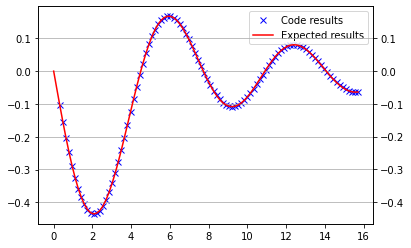

Difference:


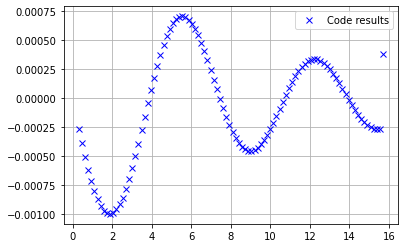

In [469]:
try:
    x = r * 5 * pi
    dx = dr * 5 * pi
    x[0] = 1e-10
    # F(x) = sin(x) / x
    DF = cos(x) / x - sin(x) / x**2
    res = loadtxt("../results/unitary_test/derive.dat")
    plot(x, res, DF)
    print("Difference:")
    plot(x, DF-res)
except OSError: print("You must run the corresponding unitary test")
except UnboundLocalError: pass

# derive at

This subroutine is the base of the `derive` subroutine. The test above is also valid 

# get cs

In [470]:
try:
    kB = 1.3806503e-16
    T = 10
    mH = 1.67262178e-24
    mu = 1.4
    res = loadtxt("../results/unitary_test/get_cs.dat")
    print(f"Expected result: {sqrt((kB * T)/(mu * mH))}")
    print(f"Code result:     {res}")
except OSError: print("You must run the corresponding unitary test")

Expected result: 24281.692454053926
Code result:     24281.692454053926


# grav force

In [471]:
try:
    x = linspace(0, 5*pi, N)
    G = 6.67408e-8 #  Gravitational constant [cm3.g-1.s-2]

    # rho(x) = e^-x
    Dphi = -4*pi*G*(exp(-x[-1]) - exp(-x[0]))
    res = loadtxt("../results/unitary_test/grav_force.dat")
    print(f"Expected result: {Dphi}")
    print(f"Code result:     {res}")
except OSError: print("You must run the corresponding unitary test")

Expected result: 8.38689501506847e-07
Code result:     1.712253283568366e-06


# integrate on sphere

In [472]:
try:
    # Rmin = 0, Rmax = 5, D = exp(-r)
    I = 4 * pi * (2 - 37/exp(5))
    res = loadtxt("../results/unitary_test/integrate_on_sphere.dat")
    print(f"Expected result: {I}")
    print(f"Code result:     {res}")
except OSError: print("You must run the corresponding unitary test")

Expected result: 21.99989427941291
Code result:     22.05307788251429


# linspace

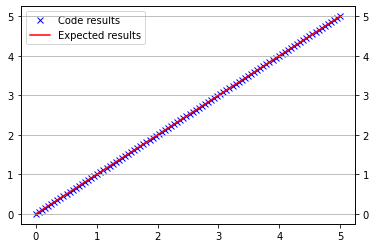

Expected result: 0.050505050505050504
Code result:     0.050505050505050504


In [473]:
try:
    x, dx = linspace(0,5,100,retstep=True)
    res = loadtxt("../results/unitary_test/linspace.dat")
    dres = loadtxt("../results/unitary_test/linspace_step.dat")
    plot(x, res, x)
    print(f"Expected result: {dx}")
    print(f"Code result:     {dres}")
except OSError: print("You must run the corresponding unitary test")
except UnboundLocalError: pass

# mass accretion rate

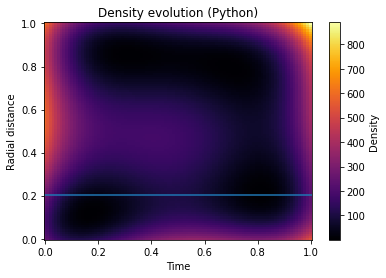

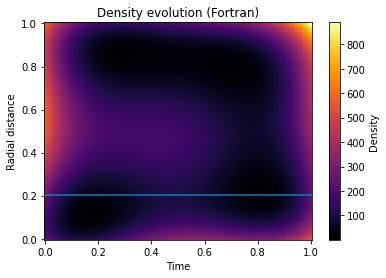

Density evolution at r=0.20202020202020204:


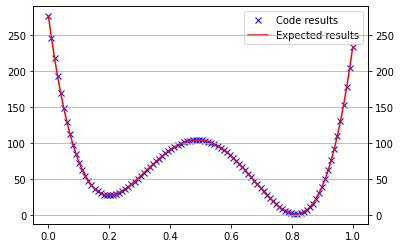

Mass accretion rate at r=0.20202020202020204:


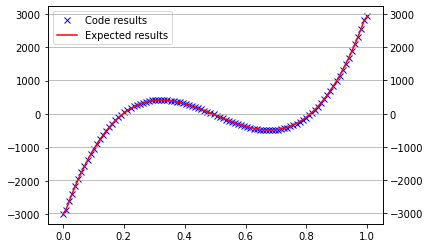

In [474]:
try:
    N = 100
    r = linspace(0,1,N)
    t,dt = linspace(0,1,N,retstep=True)
    rho = ones([N,N])

    def f(x,y): return (x**2 + y - 11)**2 + (x + y**2 -7)**2

    for i in range(N):
        x = (r-0.5)*10
        y = (t[i]-0.5)*10
        rho[i] = f(x,y)

    plt.pcolor(t,r,rho.transpose(), shading='auto', cmap="inferno")
    plt.colorbar(label='Density')
    plt.xlabel("Time")
    plt.ylabel("Radial distance")
    plt.title("Density evolution (Python)")
    plt.axhline(y=r[20])
    plt.show()

    
    res_rho = loadtxt("../results/unitary_test/mass_accretion_rate_rho.dat")
    res_rho = reshape(res_rho, [N,N])
    res = loadtxt("../results/unitary_test/mass_accretion_rate.dat")

    plt.pcolor(t,r,res_rho, shading='auto', cmap="inferno")
    plt.colorbar(label='Density')
    plt.xlabel("Time")
    plt.ylabel("Radial distance")
    plt.title("Density evolution (Fortran)")
    plt.axhline(y=r[20])
    plt.show()

    res_rho = res_rho.transpose()
    print(f"Density evolution at r={r[20]}:")
    plot(r,res_rho[:,20],rho[:,20])
    print(f"Mass accretion rate at r={r[20]}:")
    plot(r,res,gradient(rho[:,20])/dt)
except OSError: print("You must run the corresponding unitary test")
except UnboundLocalError: pass